In [3]:
import warnings #
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from plotnine import *
import plotnine

import pandas as pd
import numpy as np
import folium


%config InlineBackend.figure_format ='retina'

import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/HMFMPYUN.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [4]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='HMFMPYUN')

In [7]:
park = pd.read_excel('C:/Users/admin/Documents/PythonStudy0/Pandas/source/Upgarde/part6/전국도시공원표준데이터.xls', encoding='euc-kr')

In [8]:
park.tail()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
18862,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,NaN,야외무대,NaN,NaN,"조형파고라, 앉음벽",1998-07-20,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구
18863,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,NaN,화장실,NaN,NaN,1973-03-02,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18864,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,NaN,NaN,NaN,NaN,NaN,1977-06-29,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18865,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,NaN,NaN,NaN,NaN,NaN,1978-02-14,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18866,47760-00005,삼지연꽃 테마파크,수변공원,NaN,경상북도 영양군 영양읍 삼지리 200,36.662816,129.129372,380000.0,NaN,NaN,화장실,NaN,체험장,2009-11-19,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군


findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.
findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.
findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.


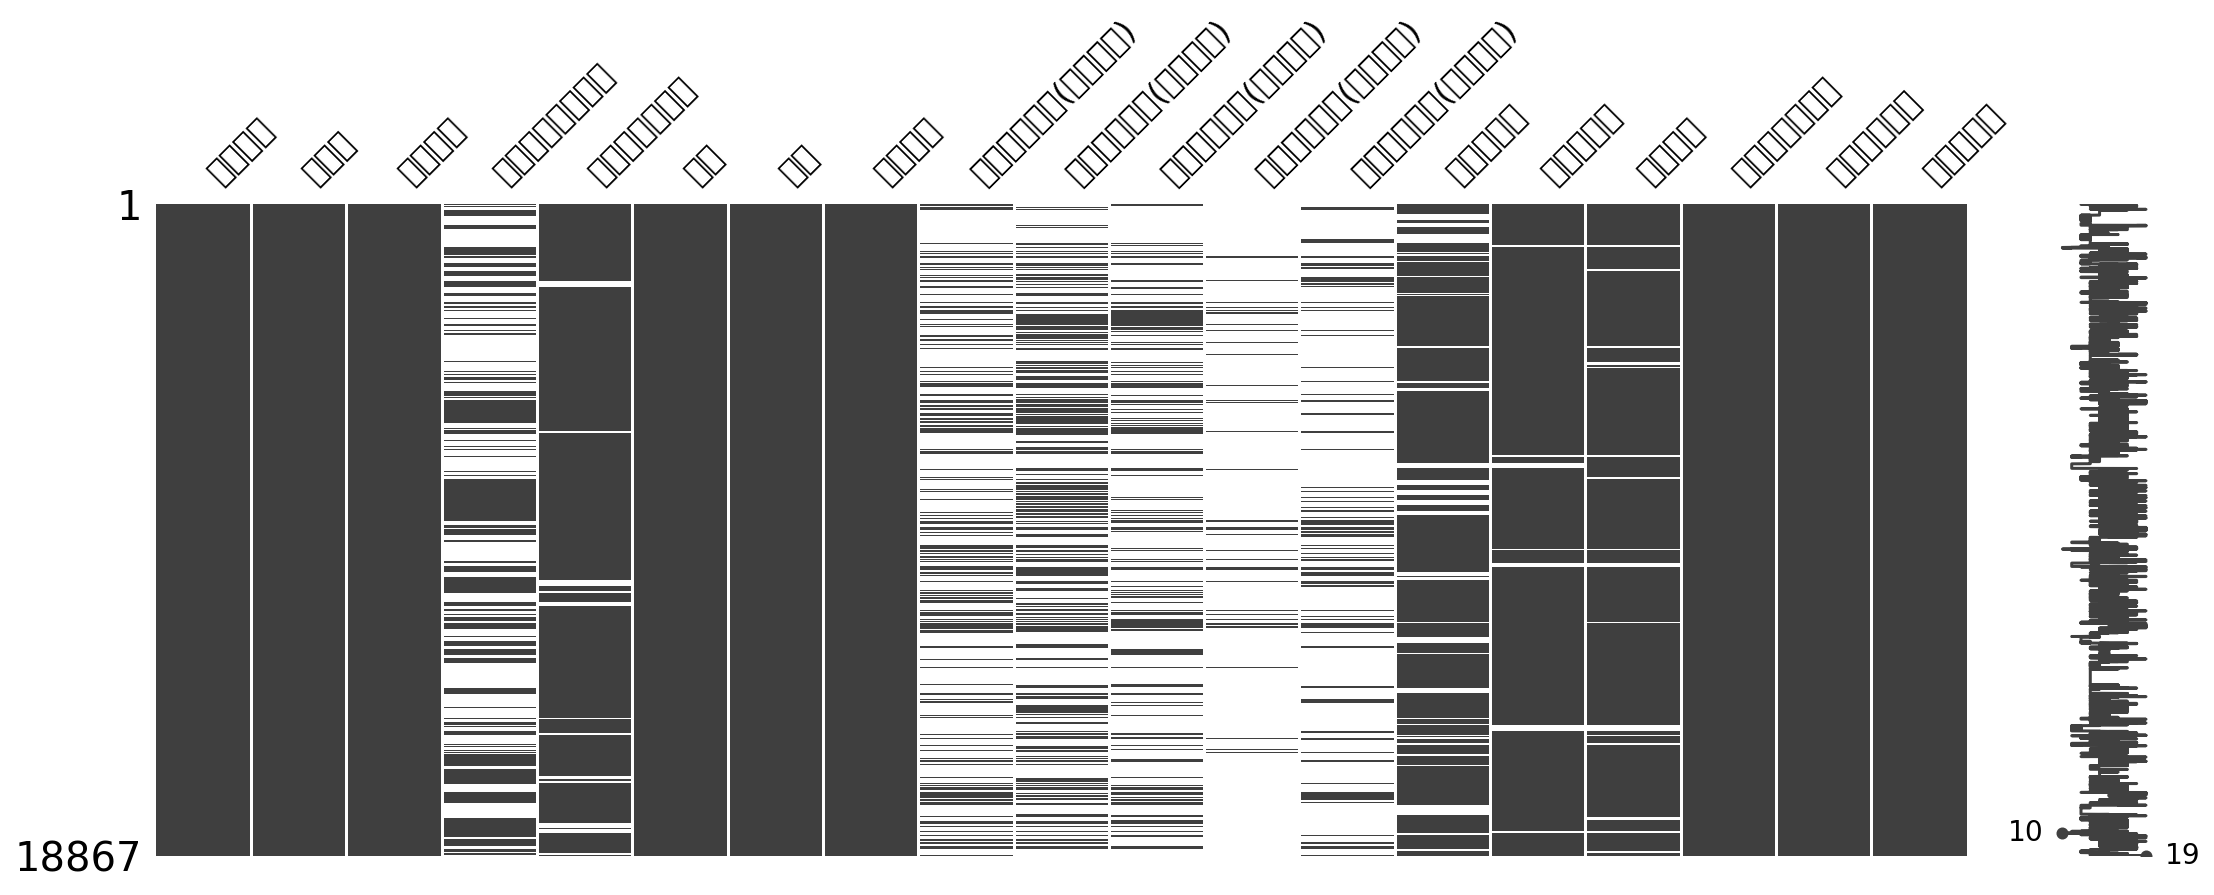

In [11]:
import missingno as msno
msno.matrix(park, figsize=(18,6))

In [12]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(기타시설)',
                  '지정고시일', '관리기관명'], inplace=True)

In [14]:
park.shape

(18867, 13)

findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.
findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.


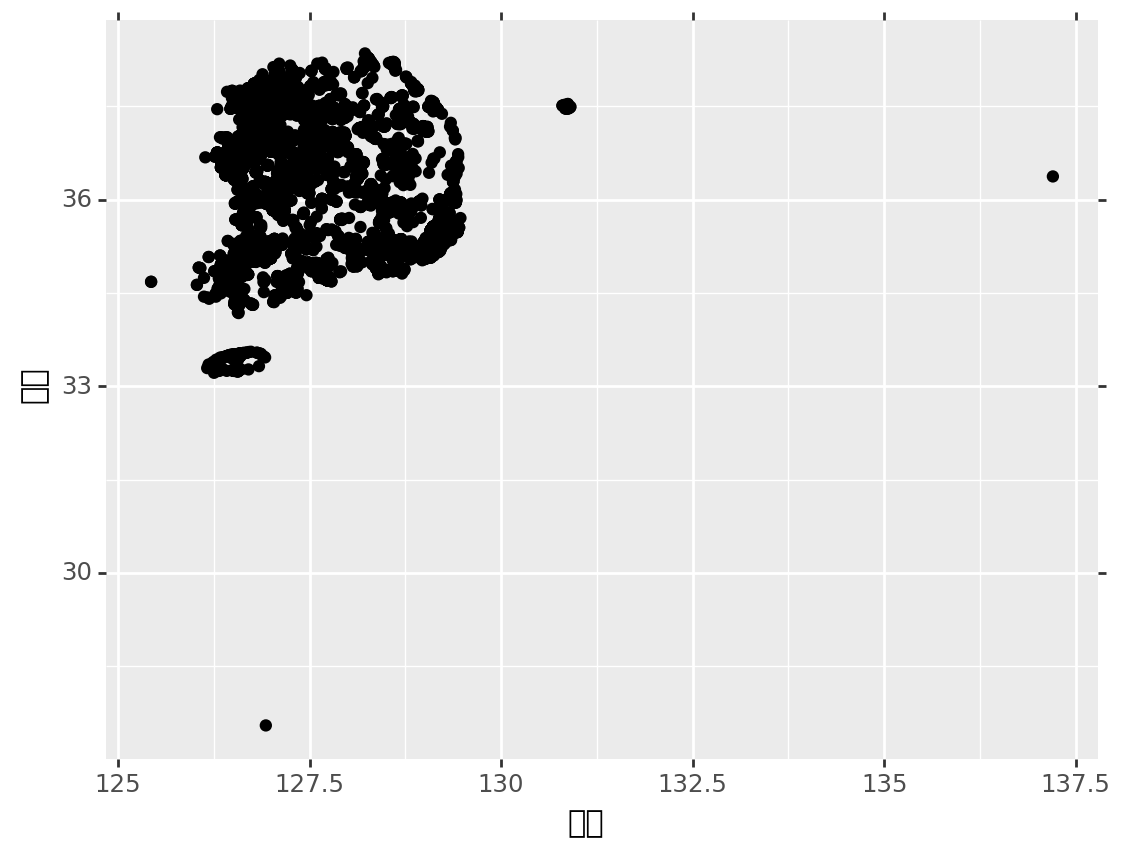

<ggplot: (-9223371879362885192)>

In [15]:
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='HMFMPYUN'))
)

In [16]:
park_do = pd.DataFrame(park['시도'].value_counts())
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'], asceding=False)
park_sido

KeyError: '시도'